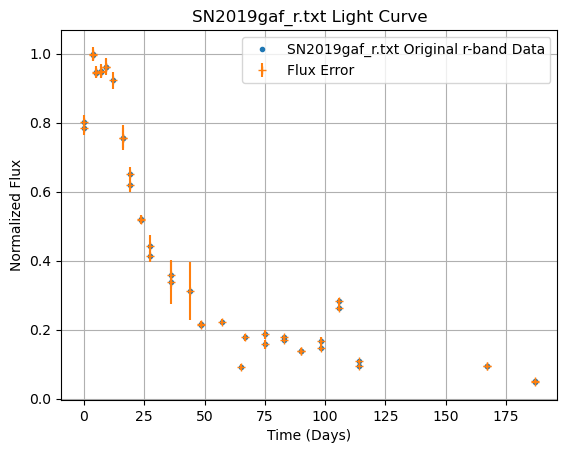

C:\Users\demol\anaconda3\lib\site-packages\astropy\timeseries\io\kepler.py:82: UserWarning: Ignoring 82 rows with NaN times
  warnings.warn(f'Ignoring {np.sum(nans)} rows with NaN times')
C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:169: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


Rise time of Kepler estimated by eye = 7.621774918399751
Unnormalized Kepler slope at shock breakout found visually from the graph =  50.1342888914945


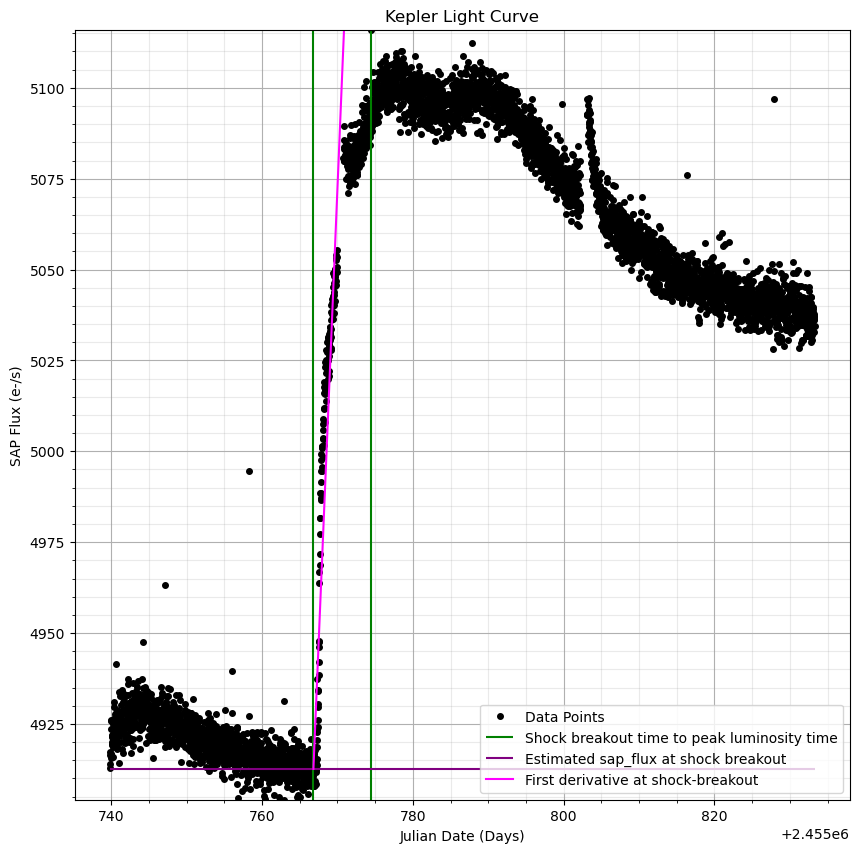

Slope at shock breakout estimated by eye =  0.009799538450981212
The number of days in the interval between the discovery time and the end of usable dataset:  23.478189711924642


C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:268: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


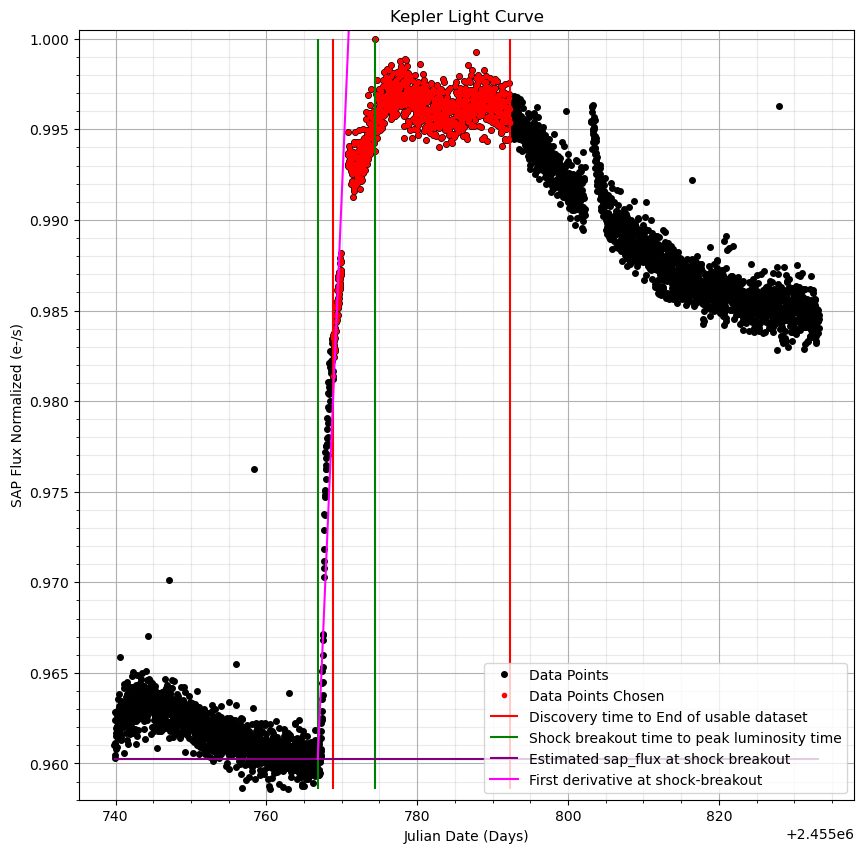

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:314: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


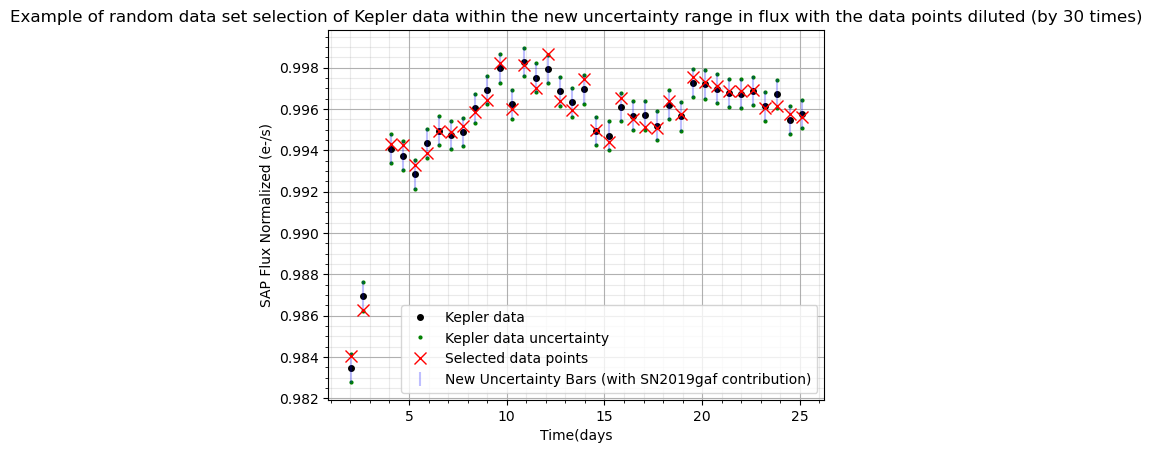

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:363: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


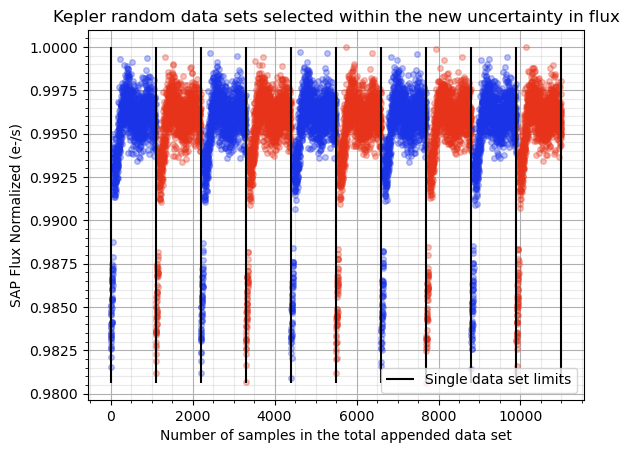

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:461: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


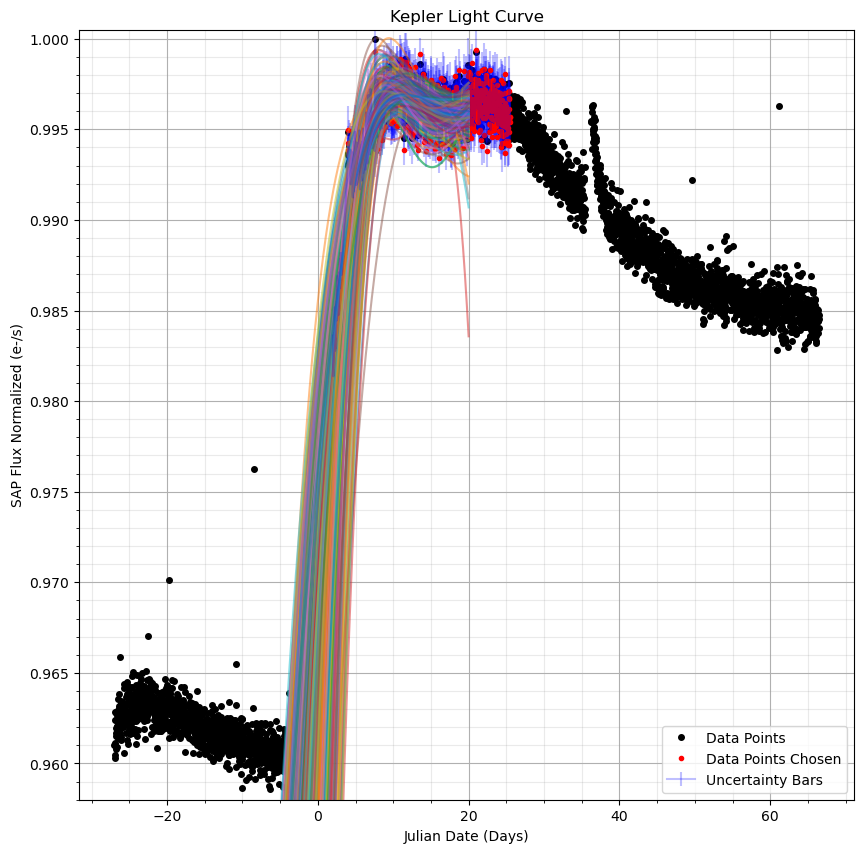

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:474: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


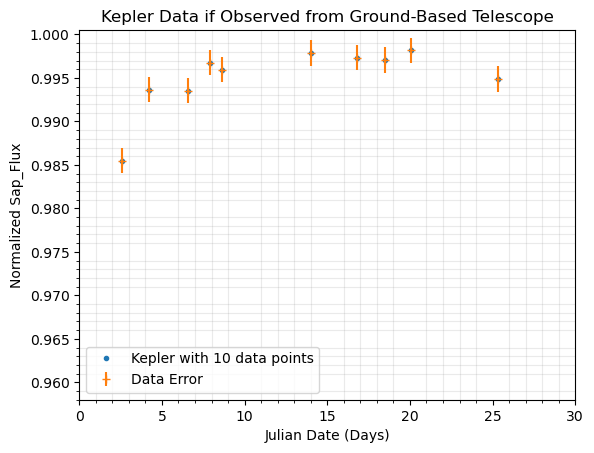

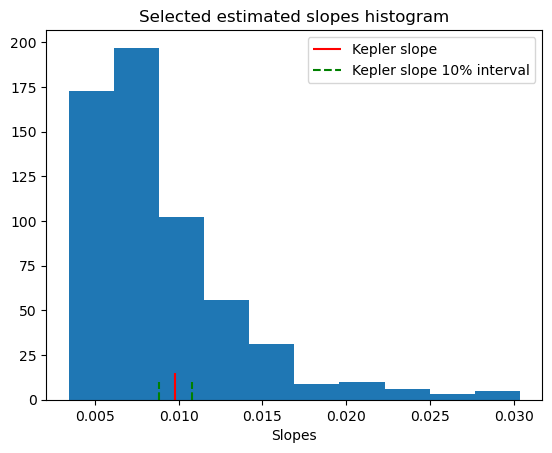

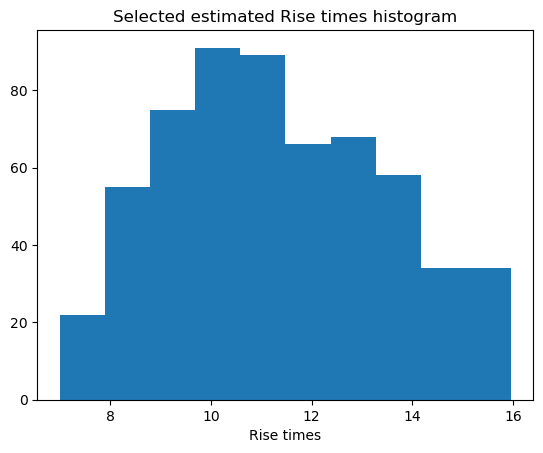

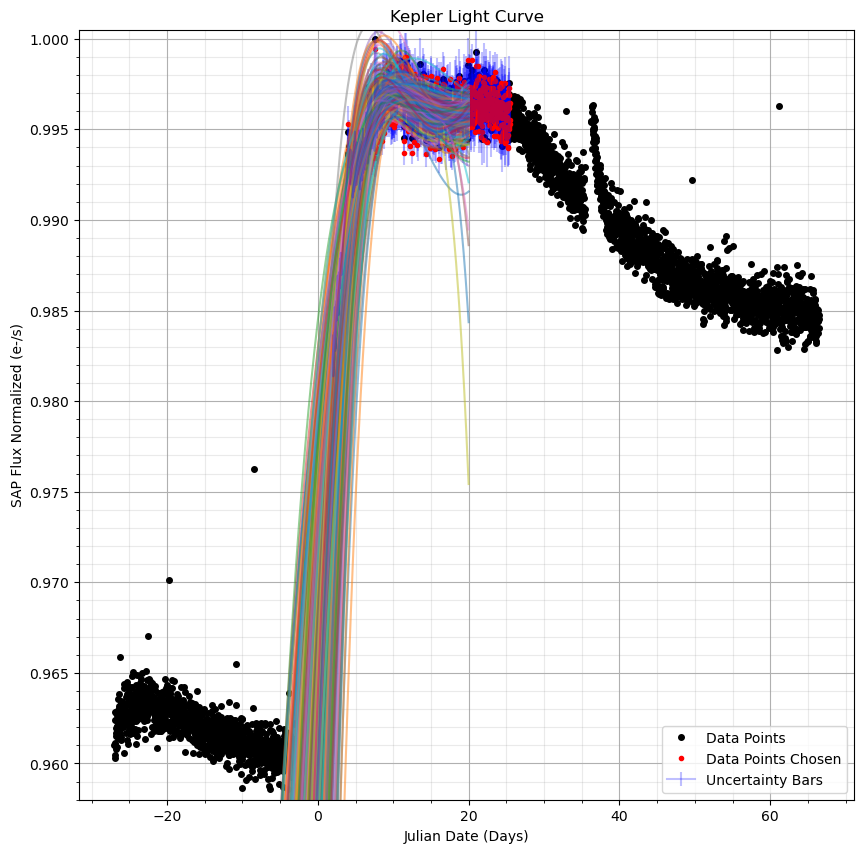

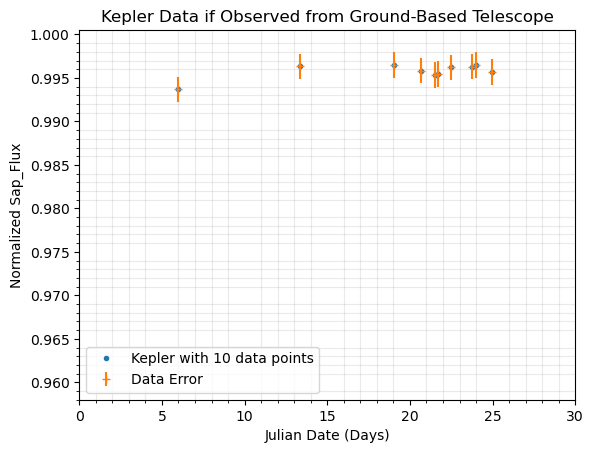

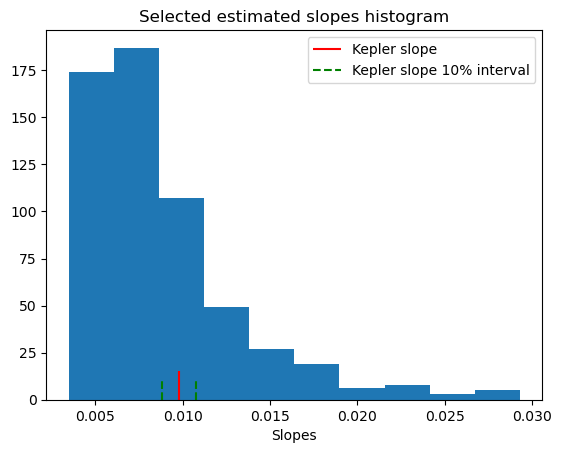

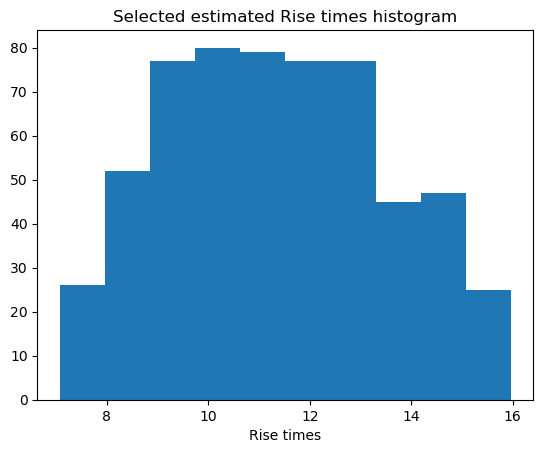

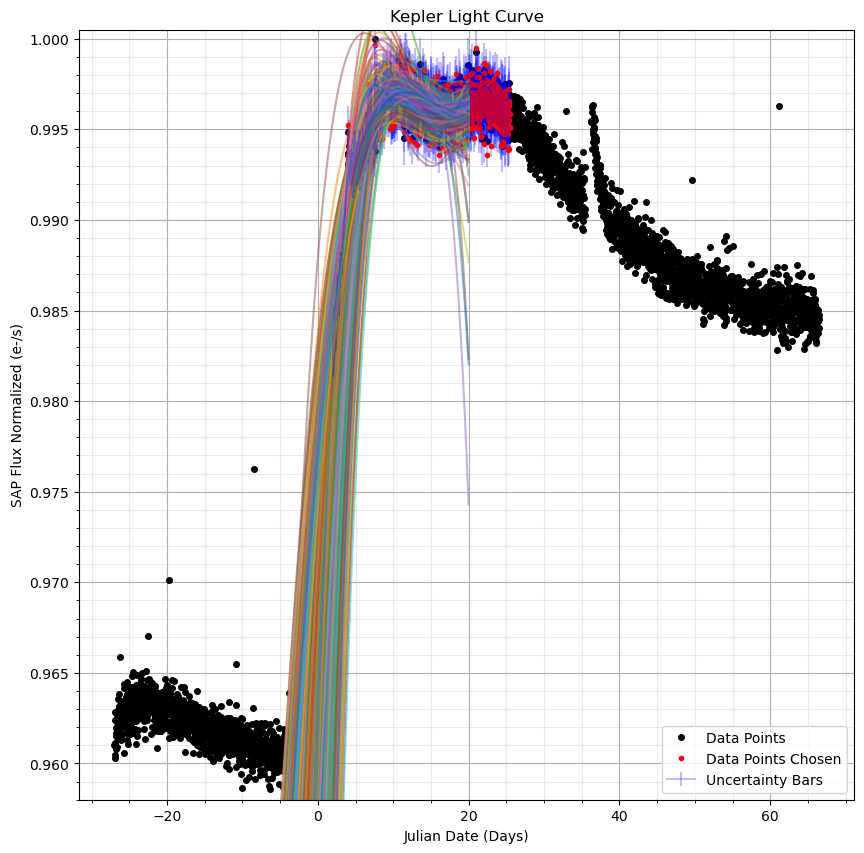

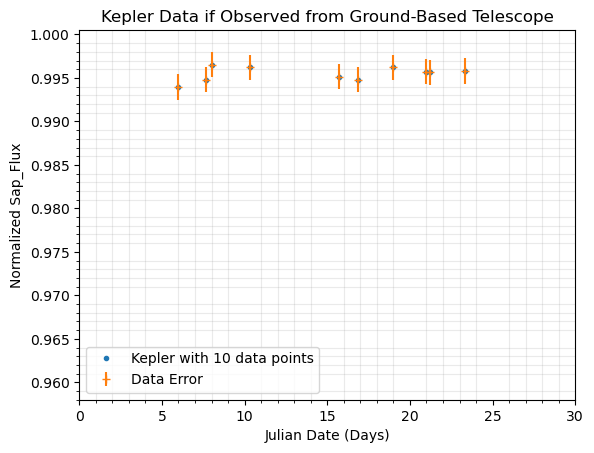

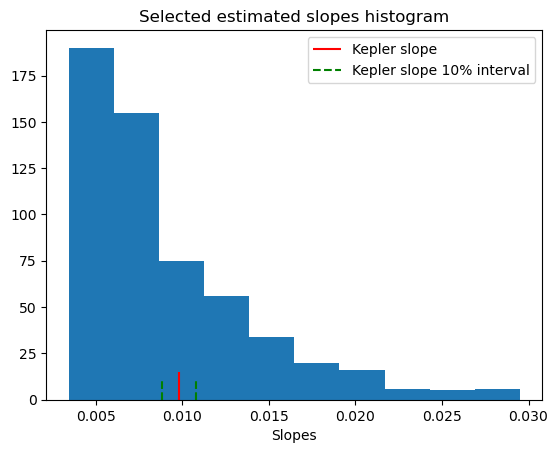

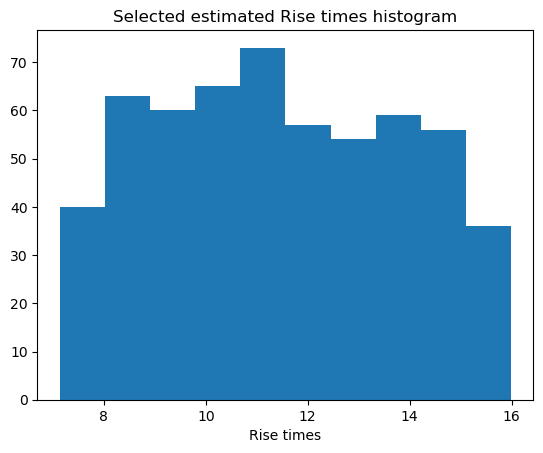

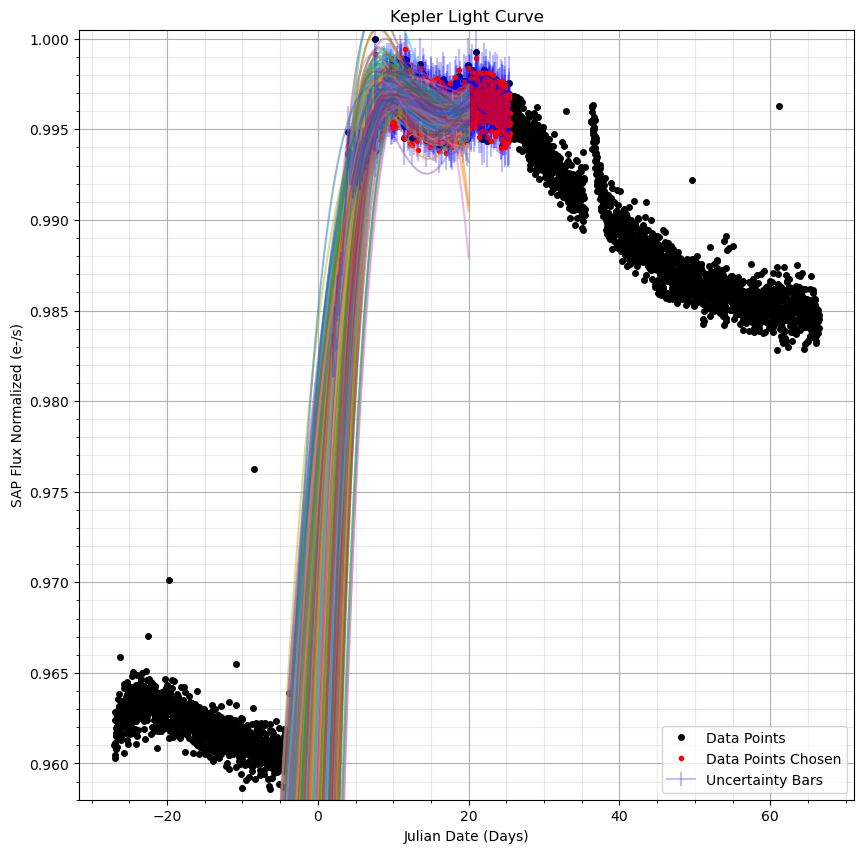

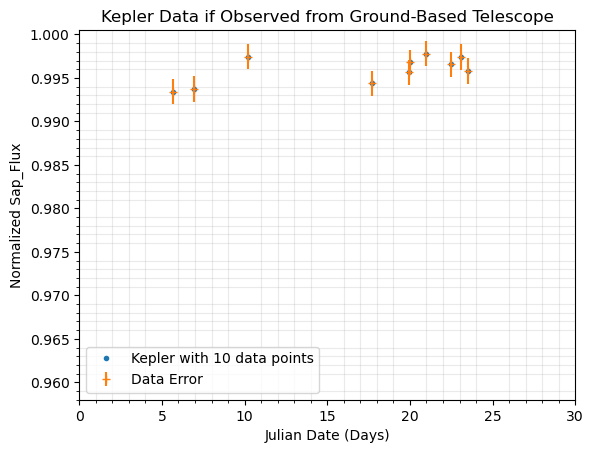

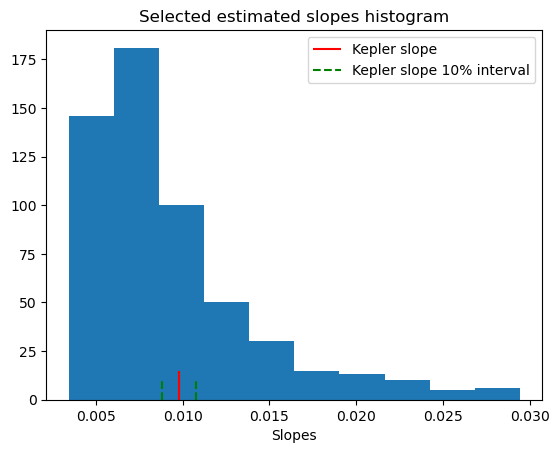

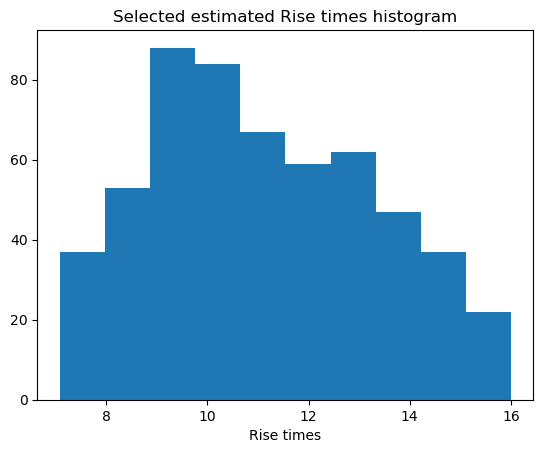

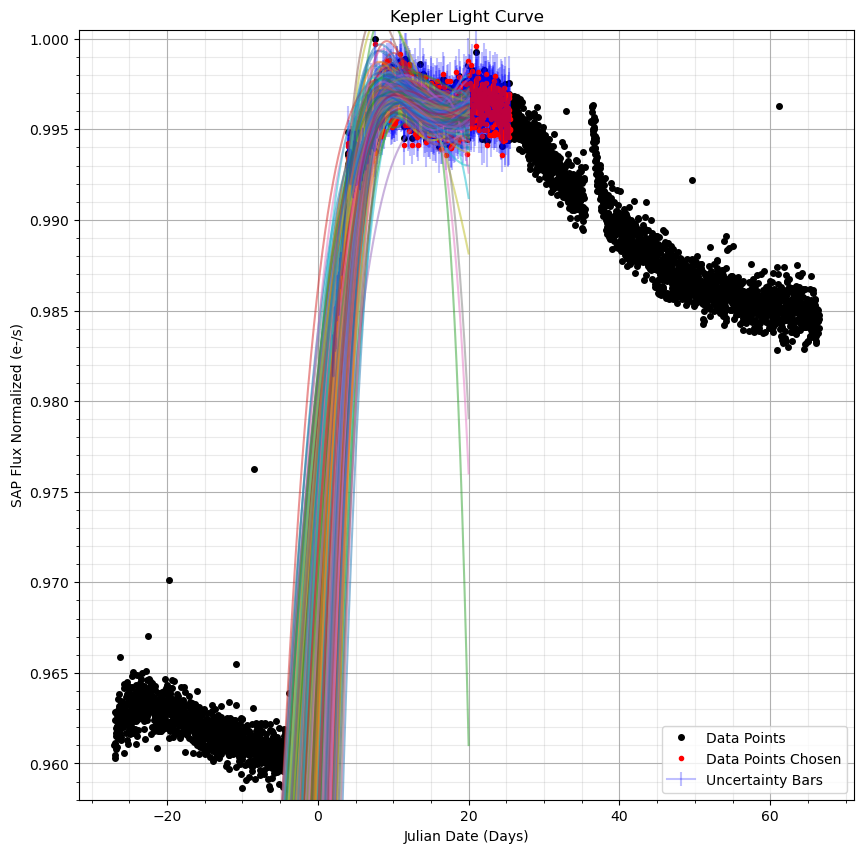

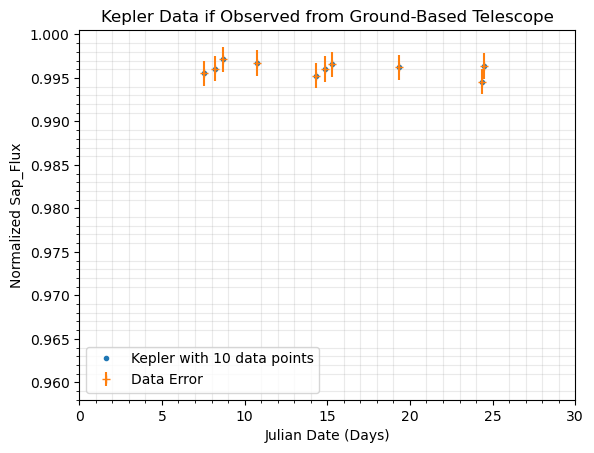

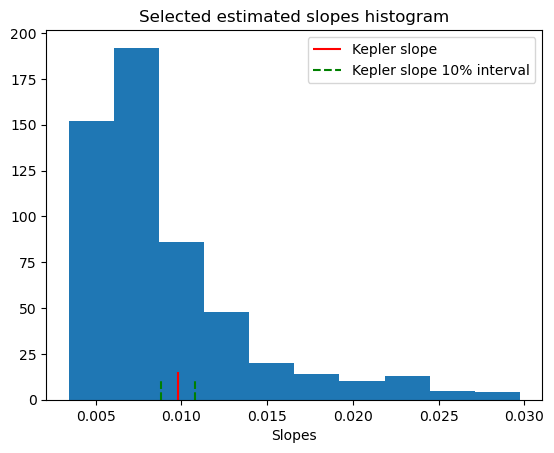

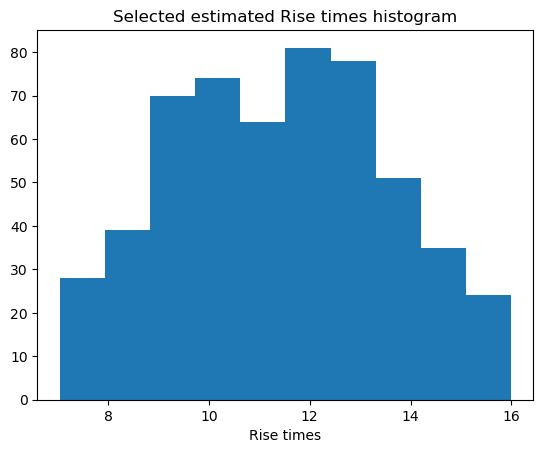

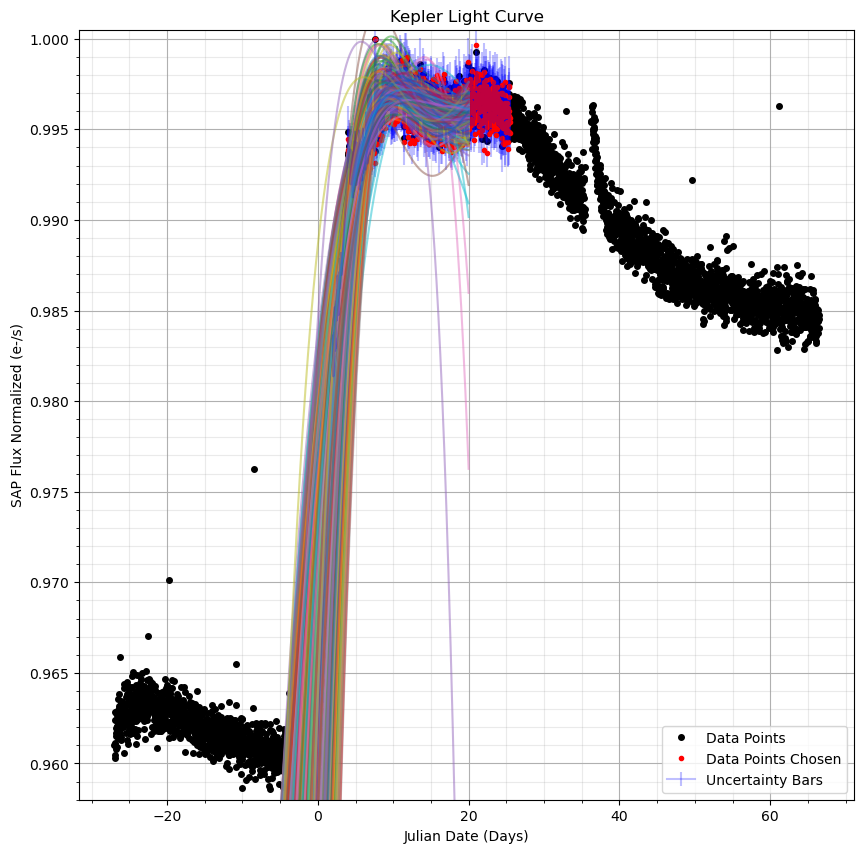

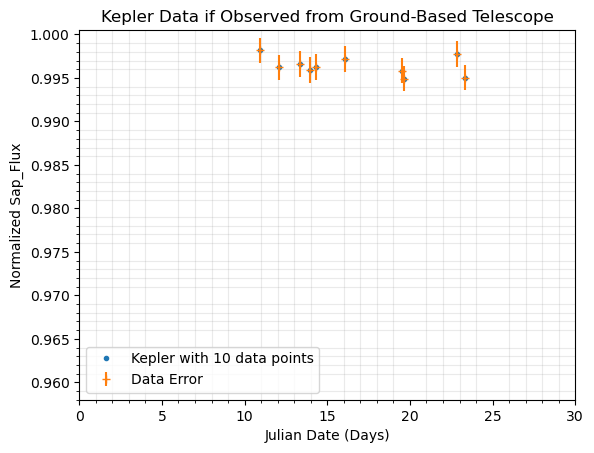

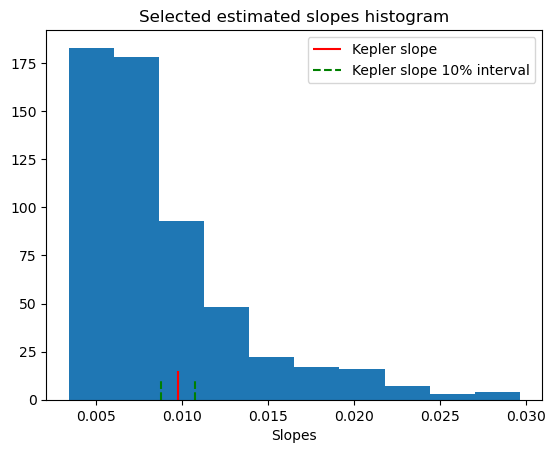

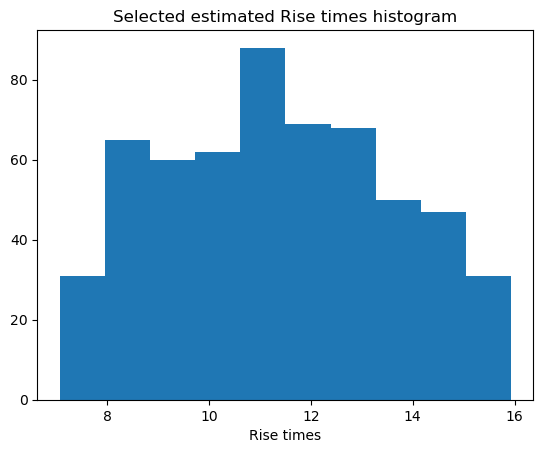

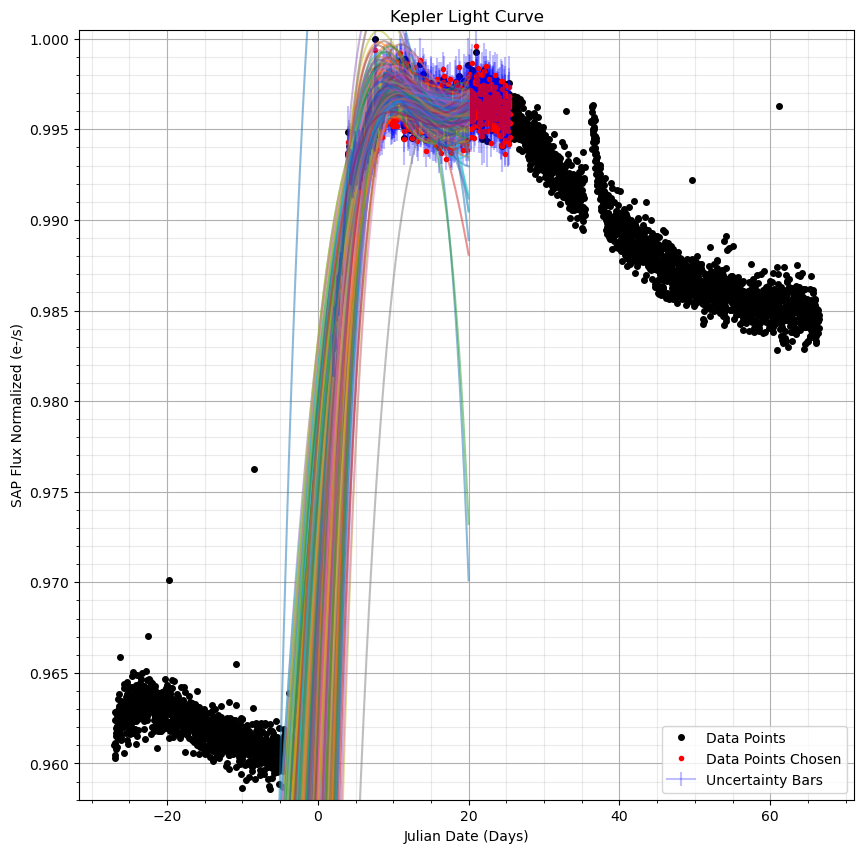

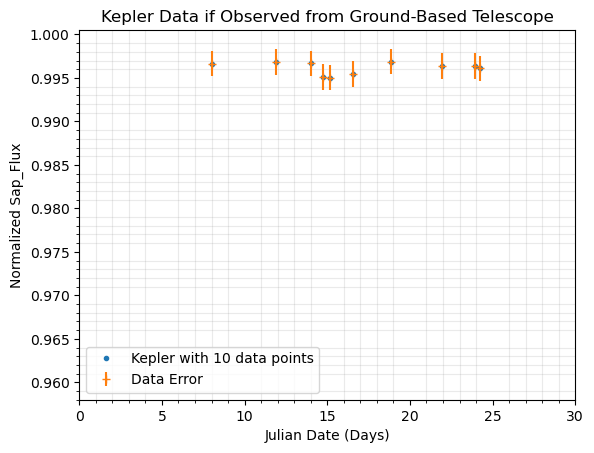

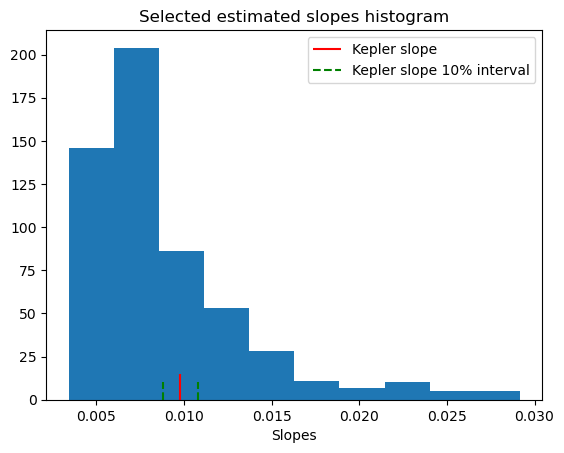

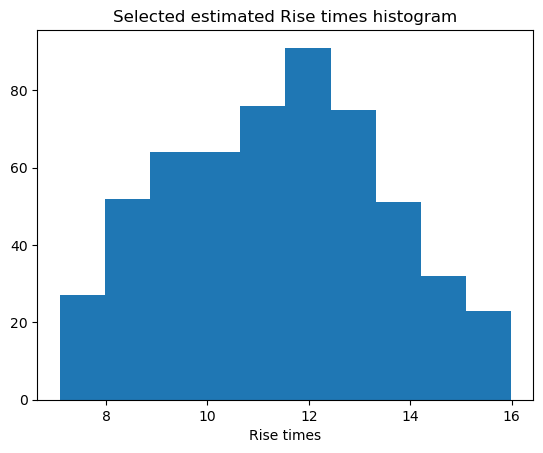

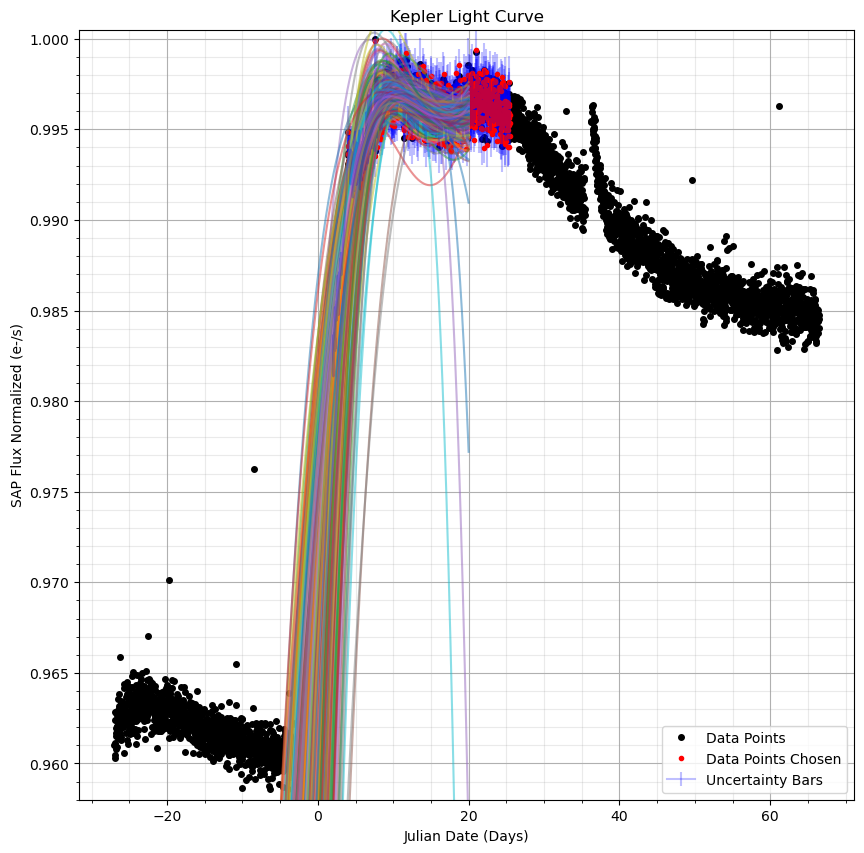

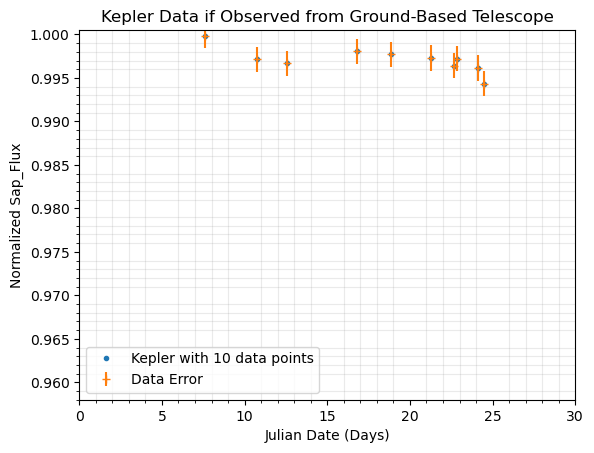

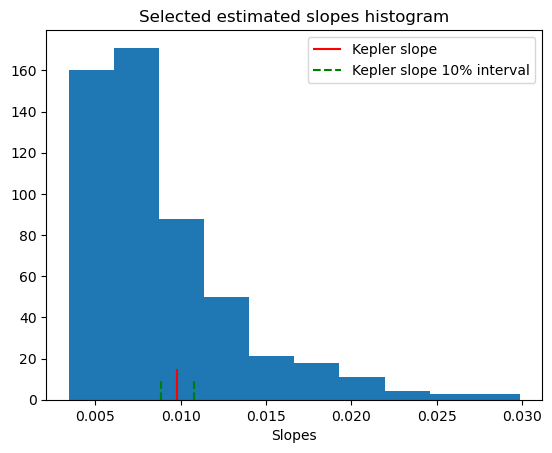

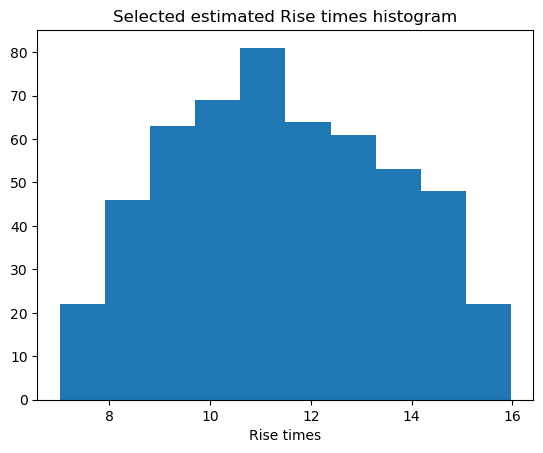

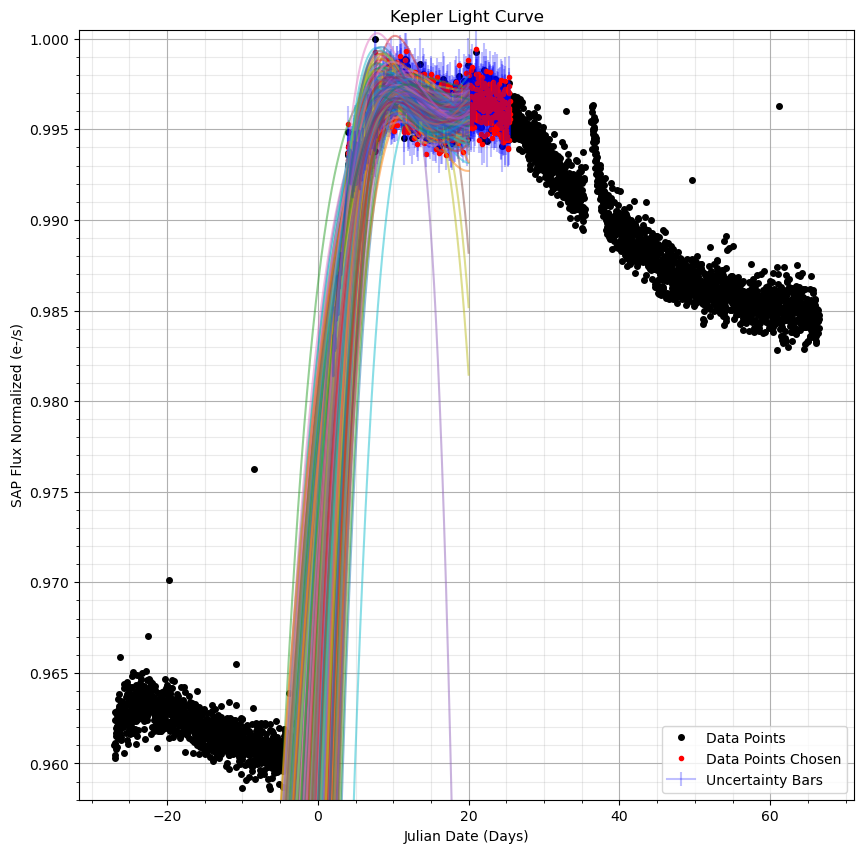

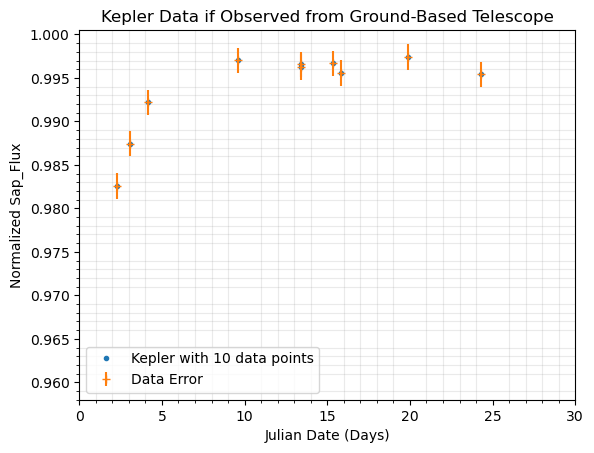

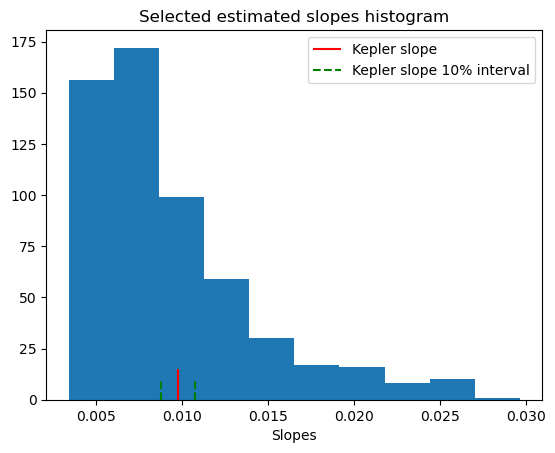

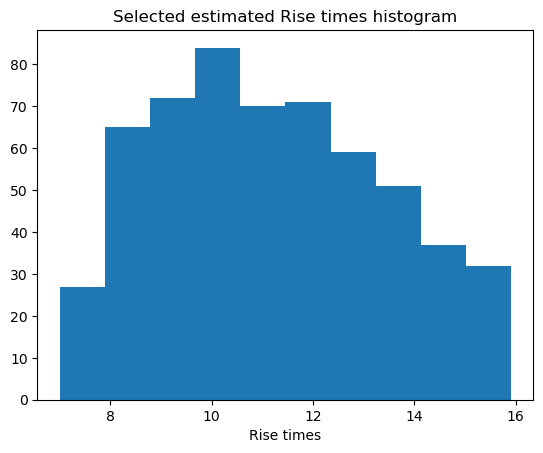

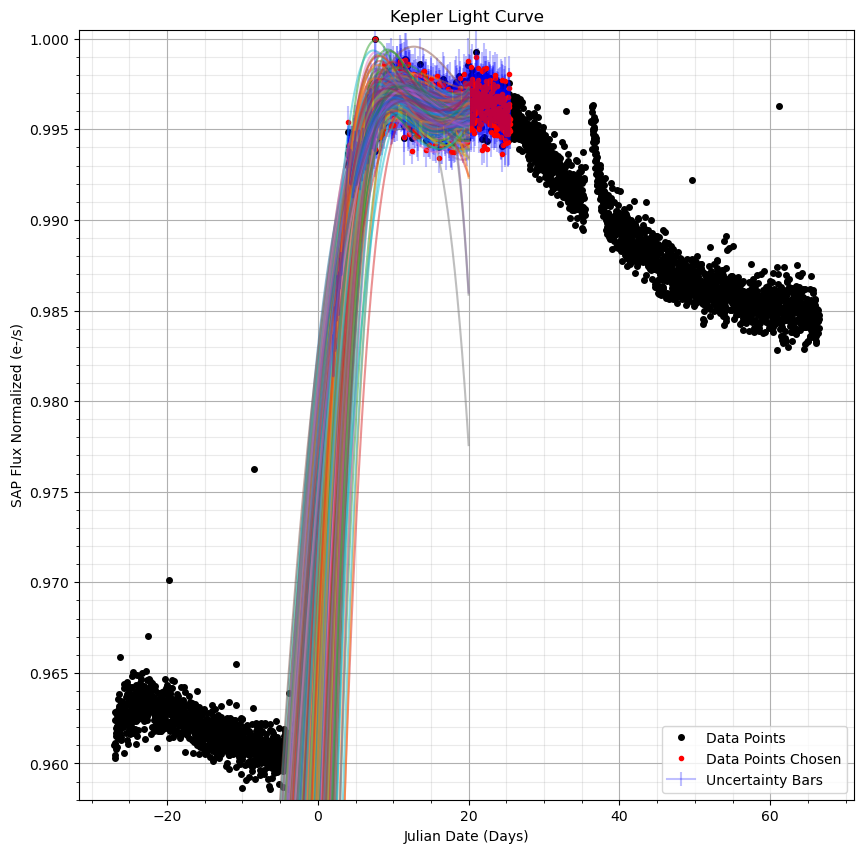

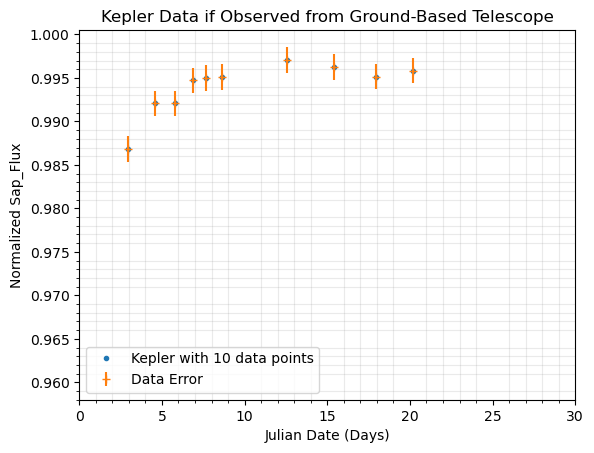

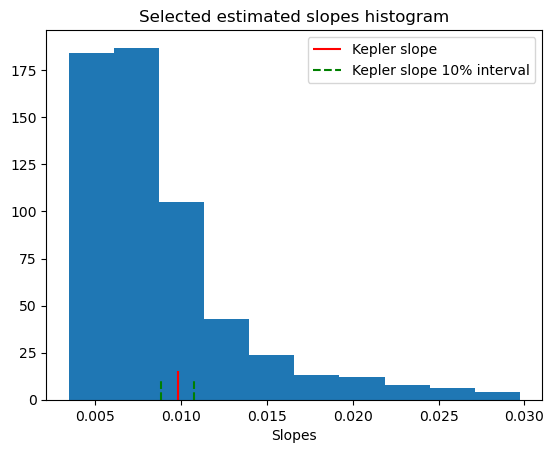

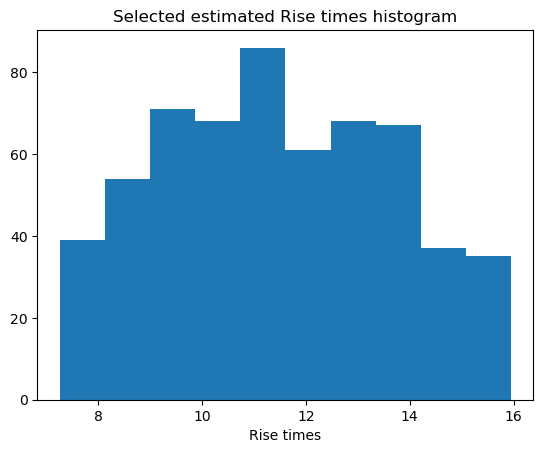

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:544: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


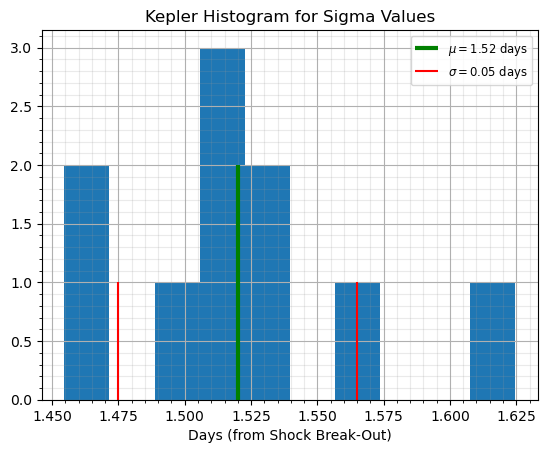

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:596: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


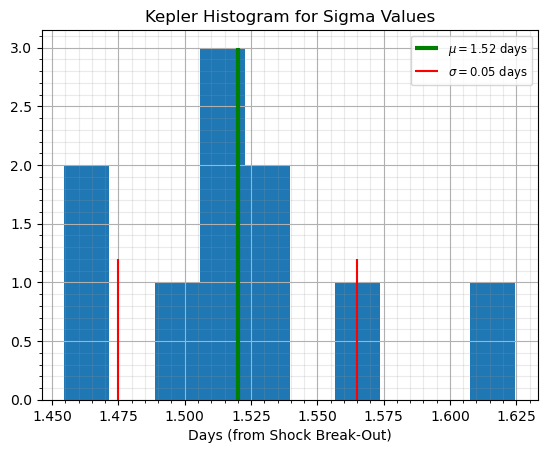

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:613: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


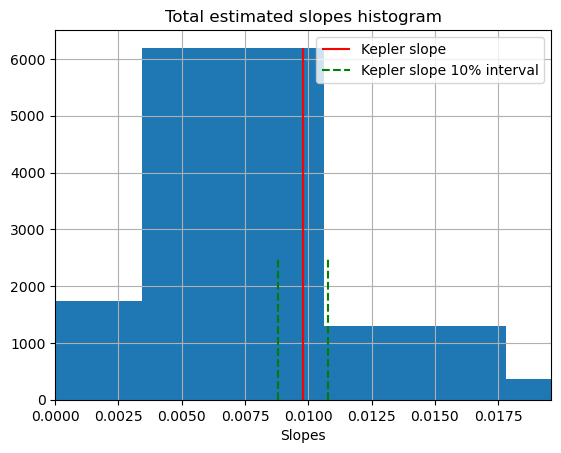

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:629: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


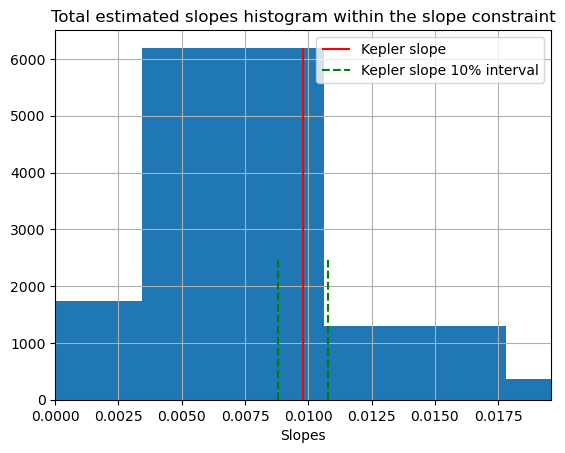

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:648: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


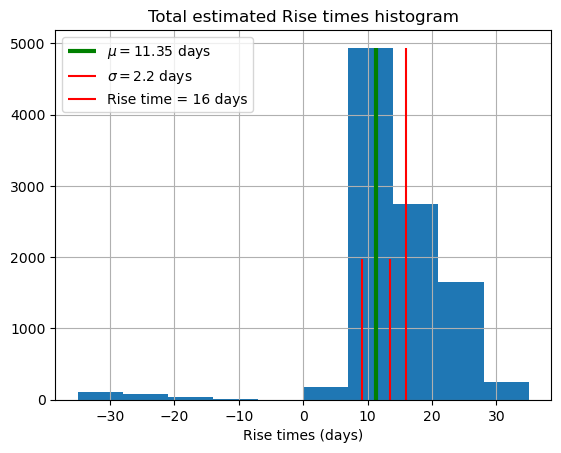

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:667: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


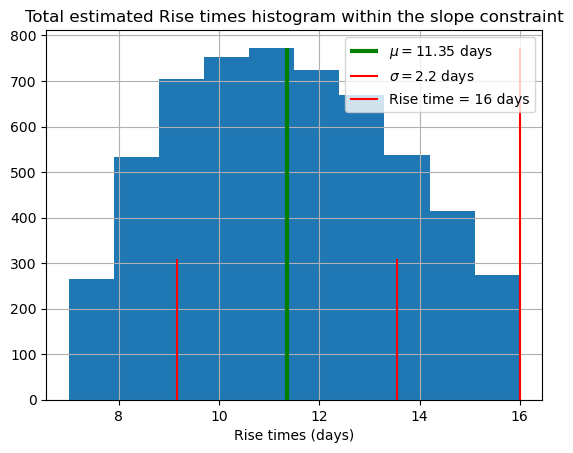

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:689: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


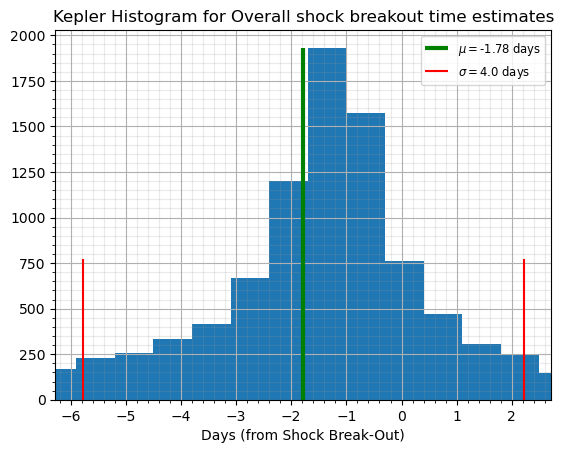

C:\Users\demol\AppData\Local\Temp\ipykernel_33056\4097045087.py:711: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


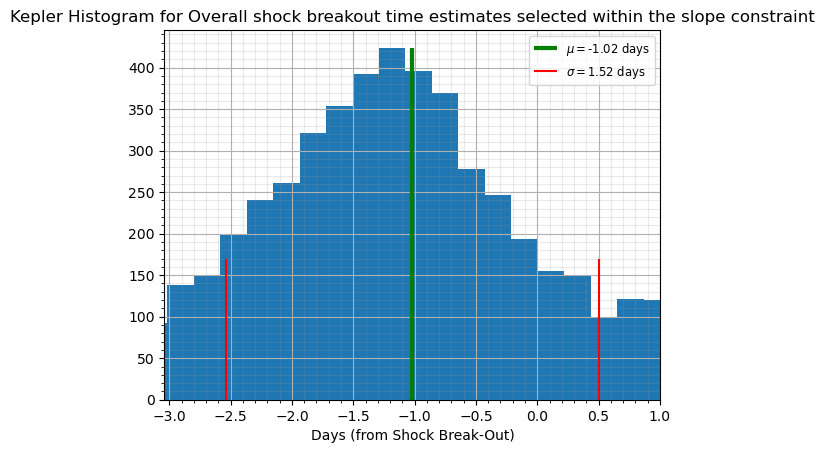

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 28 17:28:12 2022

"""


### Testing Quartic Fit to SN Light Curve Data with Kepler data having a Known Shock Breakout Time ###
### By: Abhinav Rijal, Dymetris Ramirez and Colter Richardson ###


### Loading Python Packages Used Throughout the Code
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from astropy.timeseries import TimeSeries
from scipy import optimize
import time as timer
import pandas as pd
Start = timer.time()


def SN_GT_Uncertainty(SNe_file):
    '''
    This function is used to calculate the average uncertainty recorded for SNe
    Data from a ground based telescope. By inputting the SNe txt file, it must 
    have the columns ['time','mag','dmag','flux','dflux']
    '''
    
    ### SN2019gaf data import and normalization (normalization is used for the plot, doesnot affect the uncertainty calculation)
    df = pd.read_csv(str(SNe_file),sep="\s+", names=['time','mag','dmag','flux','dflux'])
    dflux = df.dflux / np.max(df.flux)
    flux = df.flux / np.max(df.flux)
        
    T1 = df.time - df.time[0] # Time shift to start at 0 instead of 18638.1 (Julian of SN2019gaf)
        
        
    ### Plotting the light curve of SN2019gaf
    plt.figure()
    plt.plot(T1, flux, '.', label = str(SNe_file) + ' Original r-band Data')
    plt.errorbar(T1,flux, yerr = dflux, xerr = None, fmt = '+', label = 'Flux Error')
    plt.grid()
    plt.legend()
    plt.xlabel('Time (Days)')
    plt.ylabel('Normalized Flux')
    plt.title(str(SNe_file) + ' Light Curve')
    plt.savefig(str(SNe_file) + '_data_original.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
        
    ### Finding the absolute Average percentage uncertainty in fluctuation for SN
    pe = np.zeros(len(flux))
    for i in range(len(flux)):
        pe[i] = (dflux[i])/(flux[i])
    Average_pe = (np.mean(np.abs(pe)))
    
    return Average_pe

def Kepler_Quartic_Interpolation(kepler_data, Average_pe, initial_time_index, 
                                 kepler_scale, low, high, mean_sig_number,
                                 time_index,time_end_index, random_datasets_number, 
                                 random_iteration_points_number, iteration_number,
                                 xlim_start, xlim_end): 
    '''
    

    Parameters
    ----------
    kepler_data : ['.fits'] file
        Certain '.fits' file for Kepler data in astropy.timeseries
    
    Average_pe : [int]
        The absolute Average percentage uncertainty in fluctuation for a
    ground based telescope.
    
    initial_time_index : [int]
        Time of shock breakout observed visually from the light curve data
    
    kepler_scale : [int]
        Scaling factor (for better estimate of the first derivative) to get tangential slope at time of shock breakout 
        by multiplying kepler_scale with rise-time slope, estimated visually
    
    low : [int]
        Lower limit for the contraining of the tangential slope
        
    high : [int]
        Upper limit for the constraining of the tangential slope
        
    mean_sig_number : [int]
        The number of random discovery time values for plotting against the mean sigma 
        
    time_index : [int] 
         Samples displaced to define the range of discovery time values (default value is s.t. time corresponding to initial_time_index+time_index is 0.51 days and peak_lum_index-time_index is 7.42 days from shock breakout
        
    time_end_index : [int]
        End index value for the slope interpolation to be fitted to w.r.t. discovery_time_index (default value is s.t. greatest possible value of end time corresponding to discovery_time_index+time_end_index is still within the homologous period of ~23 days)
        
    random_datasets_number : [int]
        Number of Random data set samples in the Used data interval and within 
        (low, high) flux
        
    random_iteration_points_number : [int]
        Number of random points in the above data sets we choose for interpolation
        
    iteration_number : [int]
        Number of iterations/Quartic fits to run through
    
    xlim_start : [int]
        Start time for fitted interpolation curves
    
    xlim_end : [int]
        End time for fitted interpolation curves
    
    

    Returns
    -------
    This function returns a series of plots such as the interpolation of
    the Kepler Light curve, histogram of selected estimated slopes, histogram
    of selected estimated rise times, histogram of mean sigma values from
    interpolations, etc.

    '''

    ### Kepler Data Import
    ts1 = TimeSeries.read(str(kepler_data), format='kepler.fits')
    time = np.array(ts1.time.jd)
    sap_flux = np.array(ts1['sap_flux'])
    sap_flux_err = np.array(ts1['sap_flux_err'])
    
    ### Removing 'nan' values
    index = np.argwhere(np.isnan(sap_flux))
    sap_flux = np.delete(sap_flux,index)
    time = np.delete(time,index)
    sap_flux_err = np.delete(sap_flux_err,index)
    
    ###  Defining initial time at the Time of Shock Breakout (used to shift the Light Curve to 0 wrt shock breakout)
    initial_time = ts1.time.jd[initial_time_index]
    
    
    ### Finding the peak luminosity index and corresponding time
    peak_lum_index = np.argmax(sap_flux)
    peak_lum_time = time[peak_lum_index]
    
    
    
    ### Rise time of Kepler
    rise_time_Kepler = peak_lum_time- initial_time
    print("Rise time of Kepler estimated by eye =", rise_time_Kepler)
    
    ### Unnormalized Kepler slope at shock breakout and plot (before we normalize the luminosity between 0 and 1)
    Kep_slope = kepler_scale*(sap_flux[peak_lum_index]-sap_flux[initial_time_index])/rise_time_Kepler # 1.879 scaling factor for better estimate of the first derivative
    print("Unnormalized Kepler slope at shock breakout found visually from the graph = ", Kep_slope)
    
    ### Kepler data plot showing the slope
    fig, ax = plt.subplots(1,1,figsize=([10,10]))
    ax.plot(time, sap_flux, '.', markersize = 8, color = 'black', label = 'Data Points')
    #ax.errorbar(time, sap_flux, yerr = sap_flux_err, color = 'blue', label = 'Uncertainty Bars', alpha=0.25) 
    plt.vlines(initial_time, np.min(sap_flux), np.max(sap_flux), color='green', label='Shock breakout time to peak luminosity time')
    plt.vlines(peak_lum_time, np.min(sap_flux), np.max(sap_flux), color='green')
    plt.hlines(sap_flux[initial_time_index], np.min(time), np.max(time), color='purple', label='Estimated sap_flux at shock breakout')
    plt.plot([initial_time, time[peak_lum_index]],[sap_flux[initial_time_index], sap_flux[initial_time_index] + Kep_slope*rise_time_Kepler], color='magenta', label='First derivative at shock-breakout')
    ax.set_xlabel('Julian Date (Days)')
    ax.set_ylabel('SAP Flux (e-/s)')
    ax.set_ylim(np.min(sap_flux), np.max(sap_flux))
    ax.set_title('Kepler Light Curve')
    ax.grid(which = "both")
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax.legend(loc = "lower right")
    plt.savefig('Kepler_data_original.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()  
    
    
    
    B = sap_flux[initial_time_index]/np.max(sap_flux) #<====== estimated sap_flux at the time of shock breakout 
    
    ### In order to use the interpolation, we require that the estimated initial slope is within a range of physically acceptable slopes for CCSN light curve. 
    ### The Kepler slope is within the range that is encoded in the script as Kepler slope (-65%, 210%).
    d = kepler_scale*(1-B)/rise_time_Kepler #d = .0098 (tangent slope at shock breakout)
    print("Slope at shock breakout estimated by eye = ", d)
    
    d_low = d*low
    d_high = d*high
    
    ### Rise time physical range (based on literature)
    rise_time_low = 7 #days
    rise_time_high = 16 #days
    
    ### Investigating sigma vs discovery time (Number of mean_sig calculations)
    mean_sig=[]
    mean_sig1=[]
    sigmas1=[]
    sigmas=[]
    discovery_times=[]
    end_times=[]
    used_time_intervals=[]
    
    Slopes_total=[]
    Rise_times_total = []
    shock_breakout_time_estimate_tot = []
    
    Slopes_selected=[]
    Rise_times_selected=[]
    shock_breakout_time_estimate_selected=[]
    
    shock_breakout_time_estimate_selected_2=[]
        
    for l in range(0, mean_sig_number):
    
        time = np.array(ts1.time.jd)
        sap_flux = np.array(ts1['sap_flux'])
        sap_flux_err = np.array(ts1['sap_flux_err'])
        
        ### Removing 'nan' values
        index = np.argwhere(np.isnan(sap_flux))
        sap_flux = np.delete(sap_flux,index)
        time = np.delete(time,index)
        sap_flux_err = np.delete(sap_flux_err,index)
        
        
        ### Choice of the discovery time index taken randomly between shock breakout time index+10 and peak lum time index-10
        discovery_time_index = random.randint(initial_time_index+time_index, peak_lum_index-time_index) # (0.51, 7.42) days from initial time
        discovery_times.append(time[discovery_time_index]-initial_time)
        
        
        ### The end of usable dataset index (for the interval for which we'll use the data to fit the quartic)
        #end_index = random.randint(2500, 2750) # 25.44 days to 30.61 days from initial time
        #end_index = 2750
        end_index = discovery_time_index+time_end_index # ~23 days from discovery time
        end_times.append(time[end_index]-initial_time)
        
    
        ### Used data time interval from the discovery time
        interval_Kepler = time[end_index]-time[discovery_time_index]
        print("The number of days in the interval between the discovery time and the end of usable dataset: ", interval_Kepler)
        used_time_intervals.append(interval_Kepler)
        
        
        
        ### Selected interval for time and flux based on the randomly chosen interval
        time_1 = time[discovery_time_index : end_index]
        sap_flux_1 = sap_flux[discovery_time_index : end_index]
        sap_flux_err_1 = sap_flux_err[discovery_time_index : end_index]
        
        
        
        
        
        ### Kepler data plot showing above decisions visually
        fig, ax = plt.subplots(1,1,figsize=([10,10]))
        ax.plot(time, sap_flux/np.max(sap_flux), '.', markersize = 8, color = 'black', label = 'Data Points')
        #ax.errorbar(time[discovery_time_index : end_index] - initial_time,sap_flux[discovery_time_index : end_index], yerr = yerr, color = 'blue', label = 'Uncertainty Bars', alpha=0.25)
        ax.plot(time_1, sap_flux_1/np.max(sap_flux),'.', color = 'red', label = 'Data Points Chosen') 
        plt.vlines(time[discovery_time_index], np.min(sap_flux/np.max(sap_flux)), 1, color='red', label='Discovery time to End of usable dataset')
        plt.vlines(time[end_index], np.min(sap_flux/np.max(sap_flux)), 1, color='red')
        plt.vlines(initial_time, np.min(sap_flux/np.max(sap_flux)), 1, color='green', label='Shock breakout time to peak luminosity time')
        plt.vlines(peak_lum_time, np.min(sap_flux/np.max(sap_flux)), 1, color='green')
        plt.hlines(B, np.min(time), np.max(time), color='purple', label='Estimated sap_flux at shock breakout')
        plt.plot([initial_time, time[peak_lum_index]],[B, B+d*rise_time_Kepler], color='magenta', label='First derivative at shock-breakout')
        ax.set_xlabel('Julian Date (Days)')
        ax.set_ylabel('SAP Flux Normalized (e-/s)')
        ax.set_ylim(0.958,1.0005)
        ax.set_title('Kepler Light Curve')
        ax.grid(which = "both")
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        ax.legend(loc = "lower right")
        plt.savefig('Kepler_data_decisions.png', dpi = 300, bbox_inches = "tight")
        plt.show()
        plt.close()    
        
        
        
        ### Multiplying the Average_pe flux uncertainty from SN2019gaf to the uncertainty in Kepler Data for the Sap_Flux
        Unc = np.zeros(len(sap_flux_err_1)) 
        for i in range(len(sap_flux_err_1)):
            Unc[i] = (Average_pe * sap_flux_err_1[i]) #*10
        
        ### Applying the new Average uncertainty of sap_flux (from the combination of the Kepler and SN2019gaf) and applying it to the random_datasets_number data points selected for fitting
        sap = []
        t = []
        Sig = []
        Sig1 = []
        sap_err =[]
        hi = (sap_flux_1-sap_flux_err_1) - Unc
        low = (sap_flux_1+sap_flux_err_1) + Unc
        sap_colors=[]
        
        
        ### Plotting an example (just to show visually) of hi,low values and random selection
        fluxR1 = np.random.uniform(low, hi)
        fluxR1 = fluxR1/np.max(sap_flux_1)
        
        fluxR11 = np.array([fluxR1[m] for m in range(0, len(fluxR1), 30)])
        time_11 = np.array([time_1[m] for m in range(0, len(fluxR1), 30)])
        sap_flux_11 = np.array([sap_flux_1[m] for m in range(0, len(fluxR1), 30)])
        sap_flux_err_11 = np.array([sap_flux_err_1[m] for m in range(0, len(fluxR1), 30)])
        Unc1 = np.array([Unc[m] for m in range(0, len(fluxR1), 30)])
        
        
        plt.figure()
        plt.plot(time_11-initial_time, sap_flux_11/np.max(sap_flux_1), '.', markersize = 8, color = 'black', label='Kepler data')
        plt.plot(time_11-initial_time, (sap_flux_11+sap_flux_err_11)/np.max(sap_flux_1), '.', markersize = 4, color = 'green', label='Kepler data uncertainty')
        plt.plot(time_11-initial_time, (sap_flux_11-sap_flux_err_11)/np.max(sap_flux_1), '.', markersize = 4, color = 'green')
        plt.errorbar(time_11-initial_time, sap_flux_11/np.max(sap_flux_1), yerr = (sap_flux_err_11 + Unc1)/np.max(sap_flux_1), color = 'blue', ls='none', label = 'New Uncertainty Bars (with SN2019gaf contribution)', alpha=0.25)
        plt.plot(time_11-initial_time, fluxR11, 'x', markersize = 8, color = 'red', label='Selected data points')
        plt.xlabel('Time(days')
        plt.ylabel('SAP Flux Normalized (e-/s)')
        plt.title('Example of random data set selection of Kepler data within the new uncertainty range in flux with the data points diluted (by 30 times)')
        plt.grid(which = "both")
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        plt.legend(loc = "lower right")
        plt.savefig('Kepler_data_set_selection.png', dpi = 300, bbox_inches = "tight")
        plt.show()
        plt.close()     
        
        
        
        
        
        ### Randomly selecting random_datasets_number points within the newly tuned uncertainity and appending them to a new array
        for j in range(random_datasets_number):
            fluxR = np.random.uniform(low, hi)
            sap = np.append(sap, fluxR)
            t = np.append(t, time_1)
            sap_err = np.append(sap_err, sap_flux_err_1 * Average_pe)
            
        
        
        ### Normalizing the error and flux of Kepler data 
        sap_err = sap_err/np.max(sap)
        yerr = ((sap_flux_err_1 + Unc)/np.max(sap))*2 # Multiplying by two for uncertainty above and below the selected point
        sap = sap/np.max(sap)
        sap_flux = sap_flux/np.max(sap_flux)
        
        
        ### Plotting all the randomly selected data sets
        sap_time=np.array([i for i in range(len(sap_flux_err_1))])
        #plt.plot(sap,'.', markersize = 8, color = 'black')
        color_index = 0
        inter = end_index - discovery_time_index
        
        for k in range(0, len(t), inter):
            if color_index % 2 == 0:
                color1 = (0.1,0.2,0.9,0.3)
            else:
                color1 = (0.9,0.2,0.1,0.3)
           
            plt.plot(sap_time, sap[k:k+inter], '.', markersize = 8, color = color1)
            plt.vlines(k, min(sap), 1, color='black')     
            sap_time = sap_time + inter
            color_index = color_index + 1
            
        plt.vlines(len(t), min(sap), 1, color='black', label='Single data set limits')
        plt.xlabel('Number of samples in the total appended data set')
        plt.ylabel('SAP Flux Normalized (e-/s)')
        plt.title('Kepler random data sets selected within the new uncertainty in flux')
        plt.grid(which = "both")
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        plt.legend(loc = "lower right")
        plt.savefig('Kepler_data_sets.png', dpi = 300, bbox_inches = "tight")
        plt.show()
        plt.close()     
         
        
        ### Fitting With Quartic Equation
        def model(x,a,b,c,d,e):
            y = a * x**4 + b * x**3 + c * x**2 + d * x + e
            return y
        
        ### Range of Model_time for How Long the Fitted Curve Extends in the Graph
        model_time = np.arange(xlim_start,xlim_end,0.001)
        
        
        ### Plot
        #Running through the iteration_number iterations and plotting the selected data points with their uncertainty values
        
        for k in range(0, len(t), inter):
            
            fig, ax = plt.subplots(1,1,figsize=([10,10]))
            ax.plot(time - initial_time, sap_flux, '.', markersize = 8, color = 'black', label = 'Data Points')
            ax.errorbar(time[discovery_time_index : end_index] - initial_time,sap_flux[discovery_time_index : end_index], yerr = yerr, color = 'blue', label = 'Uncertainty Bars', alpha=0.25)
            ax.plot(t[k:k+inter] - initial_time,sap[k:k+inter],'.', color = 'red', label = 'Data Points Chosen') 
            
            ### Creating empty arrays to store the estimates from the models
            shock_breakout_time_estimate = np.zeros(iteration_number)
            peak_flux_time_estimate = np.zeros(iteration_number)
            Rise_time = np.zeros(iteration_number)
            Slopes = np.zeros(iteration_number)
            
            ### Creating empty arrays to store the estimates from the models that get selected after applying constraint
            Slopes_sel=[]
            Rise_times_sel=[]
            shock_breakout_time_estimates_sel=[]
            
            
            # For loop to run all the number of iterations
            for i in range(iteration_number):
                #sample = random.randint(discovery_time_index,end_index,random_datasets_number)
                sample = random.randint(k, k+inter, random_iteration_points_number)
                selected_elements_time = [t[index] for index in sample]
                selected_elements_flux = [sap[index] for index in sample]
        
                # Extracting the parameters from curve fitting the data of selected_element_time and selected_elements_flux to the Quartic Model Equation
                par_opt, par_cov = optimize.curve_fit(model,selected_elements_time - initial_time, selected_elements_flux, bounds = (-np.inf, [0, np.inf, np.inf, np.inf, np.inf]))
                
                # Calculating the estimates from the curve
                index_min = np.argmin(np.abs(np.array(model(model_time, par_opt[[0]], par_opt[[1]], par_opt[[2]], par_opt[[3]], par_opt[[4]]))-B))
                index_max = np.argmax(np.array(model(model_time, par_opt[[0]], par_opt[[1]], par_opt[[2]], par_opt[[3]], par_opt[[4]])))
                shock_breakout_time_estimate[i] = model_time[index_min]
                peak_flux_time_estimate[i] = model_time[index_max]
                Rise_time[i] = peak_flux_time_estimate[i]-shock_breakout_time_estimate[i]
                Slopes[i]=par_opt[3]
                
                Slopes_total= np.append(Slopes_total, Slopes[i])
                Rise_times_total= np.append(Rise_times_total, Rise_time[i])
                shock_breakout_time_estimate_tot= np.append(shock_breakout_time_estimate_tot, shock_breakout_time_estimate[i])
                
                
                
                # Plotting Data fits that have a derived slope between percent of the by-eye slope value of the interval
                if d - d_low<= par_opt[[3]] <= d + d_high and Rise_time[i]>rise_time_low and Rise_time[i]<rise_time_high:
                    ax.plot(model_time, model(model_time, par_opt[[0]], par_opt[[1]], par_opt[[2]], par_opt[[3]], par_opt[[4]]), alpha = 0.5)
                    
                    #Storing the estimates for each iteration's plot into a new list 
                    #print("Rise time = ", Rise_time[i])
                    #print("Slopes =", Slopes[i])
                    Slopes_sel.append(Slopes[i])
                    Rise_times_sel.append(Rise_time[i])
                    shock_breakout_time_estimates_sel.append(shock_breakout_time_estimate[i])
                    
                    Slopes_selected= np.append(Slopes_selected, Slopes[i])
                    Rise_times_selected= np.append(Rise_times_selected, Rise_time[i])
                    shock_breakout_time_estimate_selected= np.append(shock_breakout_time_estimate_selected, shock_breakout_time_estimate[i])
                else:
                    pass
                
                #### Plotting Data fits that have a rise time estimate less than 16 days
                #if Rise_time[i]<16 and Rise_time[i]>0:
                #    ax.plot(model_time, model(model_time, par_opt[[0]], par_opt[[1]], par_opt[[2]], par_opt[[3]], par_opt[[4]]), alpha = 0.5)
                #    #print("Rise time = ", Rise_time[i])
                #    #print("Slopes =", Slopes[i])
                #    Slopes_sel.append(Slopes[i])
                #    Rise_times_sel.append(Rise_time[i])
                #    shock_breakout_time_estimates_sel.append(shock_breakout_time_estimate[i])
                    
                #else:
                #    pass
        
            # Plotting labels and axis names        
            ax.set_xlabel('Julian Date (Days)')
            ax.set_ylabel('SAP Flux Normalized (e-/s)')
            ax.set_ylim(0.958,1.0005)
            ax.set_title('Kepler Light Curve')
            ax.grid(which = "both")
            ax.minorticks_on()
            ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
            ax.legend(loc = "lower right")
            plt.savefig('Kepler_Quartic_VE_1000_7.png', dpi = 300, bbox_inches = "tight")
            plt.show()
            plt.close()
            
            # Plotting the selected random_number data points from Kepler that was chosen for the last iteration (used as a sanity check to show how Kepler can model a ground based telescope with few data points)
            plt.figure()
            plt.plot(selected_elements_time - initial_time, selected_elements_flux, '.', label = 'Kepler with 10 data points')
            plt.errorbar(selected_elements_time - initial_time, selected_elements_flux, yerr = yerr[0:random_iteration_points_number], fmt = '+', label = 'Data Error') #First random_iteration_points_number = 10 error points chosen
            plt.xlabel('Julian Date (Days)')
            plt.ylabel('Normalized Sap_Flux')
            plt.title('Kepler Data if Observed from Ground-Based Telescope')
            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
            plt.minorticks_on()
            plt.ylim(0.958,1.0005)
            plt.xlim(0,30)
            plt.legend()
            plt.show()
            plt.close()
            
            # Selected estimated slopes histogram
            plt.figure()
            plt.hist(Slopes_sel)
            plt.title('Selected estimated slopes histogram')
            plt.xlabel('Slopes')
            plt.vlines(x = d, ymin=0, ymax=15, colors='r', linestyles='solid', label='Kepler slope')
            plt.vlines(x = d+0.1*d, ymin=0, ymax=10, colors='g', linestyles='dashed', label='Kepler slope 10% interval')
            plt.vlines(x = d-0.1*d, ymin=0, ymax=10, colors='g', linestyles='dashed')
            plt.legend()
            plt.savefig('Slopes_iteration'+str(k)+'.png', dpi = 300, bbox_inches = "tight")
            plt.show()
            plt.close()
            
            
            # Selected estimated Rise times histogram
            plt.figure()
            plt.hist(Rise_times_sel)
            plt.title('Selected estimated Rise times histogram')
            plt.xlabel('Rise times')
            plt.savefig('Rise_times_iteration'+str(k)+'.png', dpi = 300, bbox_inches = "tight")
            plt.show()
            plt.close()
            
            
            mu1 = np.mean(shock_breakout_time_estimates_sel) #<==== Average value of shock_breakout_time_estimate_sel
            sigma1 = np.std(shock_breakout_time_estimates_sel) #<==== Standard deviation of the shock_breakout_time_estimate_sel
            Sig1 = np.append(Sig1, sigma1)
            
                    
        # Plotting the histogram of the estimated sigma values and their Average
        # plt.figure()
        # plt.hist(Sig)
        # mu_sig = np.mean(Sig) #<==== Average value of standard deviations of the shock_breakout_time_estimate_sel
        # sigma_sig = np.std(Sig) #<==== Standard deviation of the standard deviations of the shock_breakout_time_estimate_sel
        # plt.vlines(mu_sig,0, ymax=2, linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu_sig,2)) + " days")
        # plt.vlines(mu_sig+sigma_sig,0, ymax = 1, color = "Red", label = r"$\sigma=$" + str(np.round(sigma_sig,2)) + " days")
        # plt.vlines(mu_sig-sigma_sig,0, ymax = 1, color = "Red")
        # plt.xlabel("Days (from Shock Break-Out)")
        # plt.grid(which = "both")
        # plt.minorticks_on()
        # plt.title('Kepler Histogram for Sigma Values without 0 shock breakout times')
        # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        # plt.legend(fontsize = "small")
        # plt.savefig('Kepler_Hist_VE_SIG.png', dpi = 300, bbox_inches = "tight")
        # plt.show()
        # plt.close()
        
        # mean_sig.append(mu_sig)
        # sigmas=np.append(sigmas, Sig)
            
        # Plotting the histogram of the estimated sigma values and their Average
        plt.figure()
        plt.hist(Sig1)
        mu_sig1 = np.mean(Sig1) #<==== Average value of standard deviations of the shock_breakout_time_estimate_sel
        sigma_sig1 = np.std(Sig1) #<==== Standard deviation of the standard deviations of the shock_breakout_time_estimate_sel
        plt.vlines(mu_sig1,0, ymax=2, linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu_sig1,2)) + " days")
        plt.vlines(mu_sig1+sigma_sig1,0, ymax = 1, color = "Red", label = r"$\sigma=$" + str(np.round(sigma_sig1,2)) + " days")
        plt.vlines(mu_sig1-sigma_sig1,0, ymax = 1, color = "Red")
        plt.xlabel("Days (from Shock Break-Out)")
        plt.grid(which = "both")
        plt.minorticks_on()
        plt.title('Kepler Histogram for Sigma Values')
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        plt.legend(fontsize = "small")
        plt.savefig('Kepler_Hist_VE_SIG.png', dpi = 300, bbox_inches = "tight")
        plt.show()
        plt.close()
        
        mean_sig1.append(mu_sig1)
        sigmas1=np.append(sigmas1, Sig1)
    
    
    
#     ### Discovery times vs mean Sigma Values
#     plt.figure()
#     plt.plot(discovery_times, mean_sig, '.', markersize=8, color = 'black')
#     #plt.vlines(time[end_index]-initial_time, np.min(mean_sig),np.max(mean_sig), color='red')
#     #plt.vlines(peak_lum_time-initial_time, np.min(mean_sig), np.max(mean_sig), color='green')
#     plt.xlabel('Discovery time (Days)')
#     plt.ylabel('Mean sigma (Days)')
#     plt.title('mean Sigma Values vs Discovery time (removing 0 shock breakout times)')
#     #plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#     plt.legend()
#     plt.savefig('DT_vs_meanSIG.png', dpi = 300, bbox_inches = "tight")
#     plt.show()
#     plt.close()
    
#     ### Used time intervals vs mean Sigma Values
#     plt.figure()
#     plt.plot(used_time_intervals, mean_sig, '.', markersize = 8, color = 'black')
#     #plt.vlines(time[end_index]-initial_time, np.min(mean_sig),np.max(mean_sig), color='red')
#     #plt.vlines(peak_lum_time-initial_time, np.min(mean_sig), np.max(mean_sig), color='green')
#     plt.xlabel('Used time intervals (Days)')
#     plt.ylabel('Mean sigma (Days)')
#     plt.title('mean Sigma Values vs Used time intervals (removing 0 shock breakout times)')
#     #plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#     plt.legend()
#     plt.savefig('UTI_vs_meanSIG.png', dpi = 300, bbox_inches = "tight")
#     plt.show()
#     plt.close()
    
    
    # Plotting the overall histogram of all the estimated sigma values and their Average
    plt.figure()
    y, x, _ = plt.hist(sigmas1)
    mu_sig = np.mean(sigmas1) #<==== Average value of standard deviations of the shock_breakout_time_estimate
    sigma_sig = np.std(sigmas1) #<==== Standard deviation of the standard deviations of the shock_breakout_time_estimate
    plt.vlines(mu_sig,0, ymax=y.max(), linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu_sig,2)) + " days")
    plt.vlines(mu_sig+sigma_sig,0, ymax = (2/5)*y.max(), color = "Red", label = r"$\sigma=$" + str(np.round(sigma_sig,2)) + " days")
    plt.vlines(mu_sig-sigma_sig,0, ymax = (2/5)*y.max(), color = "Red")
    plt.xlabel("Days (from Shock Break-Out)")
    plt.grid(which = "both")
    plt.minorticks_on()
    plt.title('Kepler Histogram for Sigma Values')
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend(fontsize = "small")
    plt.savefig('Kepler_Hist_VE_SIG_overall.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    
    # Overall estimated slopes histogram
    plt.figure()
    y, x, _ = plt.hist(Slopes_total, bins=50)
    plt.title('Total estimated slopes histogram')
    plt.xlabel('Slopes')
    plt.vlines(x = d, ymin=0, ymax=y.max(), colors='r', linestyles='solid', label='Kepler slope')
    plt.vlines(x = d+0.1*d, ymin=0, ymax=(2/5)*y.max(), colors='g', linestyles='dashed', label='Kepler slope 10% interval')
    plt.vlines(x = d-0.1*d, ymin=0, ymax=(2/5)*y.max(), colors='g', linestyles='dashed')
    plt.xlim(d-1*d, d+1*d)
    plt.grid(which = "both")
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()
    plt.savefig('Overall_slope_hist.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    # Overall Selected estimated slopes histogram
    plt.figure()
    y, x, _ = plt.hist(Slopes_total, bins=50)
    plt.title('Total estimated slopes histogram within the slope constraint')
    plt.xlabel('Slopes')
    plt.vlines(x = d, ymin=0, ymax=y.max(), colors='r', linestyles='solid', label='Kepler slope')
    plt.vlines(x = d+0.1*d, ymin=0, ymax=(2/5)*y.max(), colors='g', linestyles='dashed', label='Kepler slope 10% interval')
    plt.xlim(d-1*d, d+1*d)
    plt.vlines(x = d-0.1*d, ymin=0, ymax=(2/5)*y.max(), colors='g', linestyles='dashed')
    plt.grid(which = "both")
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()
    plt.savefig('Overall_slope_hist_constrained.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    
    # Overall estimated Rise times histogram
    plt.figure()
    y, x, _ = plt.hist(Rise_times_total)
    mu= np.mean(Rise_times_selected)
    sigma = np.std(Rise_times_selected)
    plt.vlines(mu,0,y.max(), linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu,2)) + " days")
    plt.vlines(mu+sigma,0,(2/5) * y.max(), color = "Red", label = r"$\sigma=$" + str(np.round(sigma,2)) + " days")
    plt.vlines(mu-sigma,0,(2/5) * y.max(), color = "Red")
    plt.title('Total estimated Rise times histogram')
    plt.xlabel('Rise times (days)')
    plt.vlines(x = 16, ymin=0, ymax=y.max(), colors='r', linestyles='solid', label='Rise time = 16 days')
    plt.grid(which = "both")
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()
    plt.savefig('Overall_rise_time_hist.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    
    # Overall Selected estimated Rise times histogram
    plt.figure()
    y, x, _ = plt.hist(Rise_times_selected)
    mu= np.mean(Rise_times_selected)
    sigma = np.std(Rise_times_selected)
    plt.vlines(mu,0,y.max(), linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu,2)) + " days")
    plt.vlines(mu+sigma,0,(2/5) * y.max(), color = "Red", label = r"$\sigma=$" + str(np.round(sigma,2)) + " days")
    plt.vlines(mu-sigma,0,(2/5) * y.max(), color = "Red")
    plt.title('Total estimated Rise times histogram within the slope constraint')
    plt.xlabel('Rise times (days)')
    plt.vlines(x = 16, ymin=0, ymax=y.max(), colors='r', linestyles='solid', label='Rise time = 16 days')
    plt.grid(which = "both")
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend()
    plt.savefig('Overall_rise_time_hist_constrained.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    
    
    # Overall histogram of the derived shock_breakout_time_estimate values 
    plt.figure()
    y, x, _ = plt.hist(shock_breakout_time_estimate_tot, bins=50)
    mu = np.mean(shock_breakout_time_estimate_tot) #<==== Average value of shock_breakout_time_estimate_tot
    sigma = np.std(shock_breakout_time_estimate_tot) #<==== Standard deviation of the shock_breakout_time_estimate_tot
    plt.vlines(mu,0,y.max(), linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu,2)) + " days")
    plt.vlines(mu+sigma,0,(2/5) * y.max(), color = "Red", label = r"$\sigma=$" + str(np.round(sigma,2)) + " days")
    plt.vlines(mu-sigma,0,(2/5) * y.max(), color = "Red")
    plt.vlines(1,1,1, color = "White") 
    plt.xlabel("Days (from Shock Break-Out)")
    plt.grid(which = "both")
    plt.minorticks_on()
    plt.title('Kepler Histogram for Overall shock breakout time estimates')
    plt.xlim(mu-sigma-.5,mu+sigma+.5)
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend(fontsize = "small")
    plt.savefig('Kepler_Hist_VE_1000_7_overall.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()
    
    
    
    # Overall Selected histogram of the derived shock_breakout_time_estimate values 
    plt.figure()
    y, x, _ = plt.hist(shock_breakout_time_estimate_selected, bins=50)
    mu = np.mean(shock_breakout_time_estimate_selected) #<==== Average value of shock_breakout_time_estimate_selected
    sigma = np.std(shock_breakout_time_estimate_selected) #<==== Standard deviation of the shock_breakout_time_estimate_selected
    plt.vlines(mu,0,y.max(), linewidth = 3, color = "Green", label = r"$\mu=$"+ str(np.round(mu,2)) + " days")
    plt.vlines(mu+sigma,0,(2/5) * y.max(), color = "Red", label = r"$\sigma=$" + str(np.round(sigma,2)) + " days")
    plt.vlines(mu-sigma,0,(2/5) * y.max(), color = "Red")
    plt.vlines(1,1,1, color = "White") 
    plt.xlabel("Days (from Shock Break-Out)")
    plt.grid(which = "both")
    plt.minorticks_on()
    plt.title('Kepler Histogram for Overall shock breakout time estimates selected within the slope constraint')
    plt.xlim(mu-sigma-.5,mu+sigma+.5)
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.legend(fontsize = "small")
    plt.savefig('Kepler_Hist_VE_1000_7_overall_constrained.png', dpi = 300, bbox_inches = "tight")
    plt.show()
    plt.close()

#Perfroming Kepler_2011d data fit using functions:
Kepler_Quartic_Interpolation('kplr008480662-2011271113734_llc.fits', 
                             SN_GT_Uncertainty('SN2019gaf_r.txt'), 1320, 1.879,
                             (65/100), (210/100), 1, 10, 1100, 10, 10, 1000, 
                             -15, 20) # (65%, 210%) and not +-10% range 

